# 0) Import packages

In [45]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np

from pytorch_lightning import seed_everything

# import custom libraries
from data.s1_dataset import Sentinel1Dataset
from data.s1_dataset_normalization import linear_norm_global_minmax, linear_norm_global_percentile, global_standardization

In [2]:
seed_everything(96, workers=True)

Seed set to 96


96

# 1) Initialize and inspect dataset

In [36]:
training_dir = '/mnt/guanabana/raid/home/pasan001/thesis/dataset/asm_dataset_split_0/s1/training_data'

training_dataset = Sentinel1Dataset(training_dir,
                                 pad=False,
                                 normalization=linear_norm_global_minmax)

In [37]:
training_dataset[0][0]

tensor([[[0.3903, 0.3791, 0.3791,  ..., 0.4943, 0.4885, 0.4885],
         [0.3903, 0.3791, 0.3767,  ..., 0.4791, 0.4791, 0.4885],
         [0.3707, 0.3707, 0.3725,  ..., 0.4648, 0.4688, 0.4865],
         ...,
         [0.4546, 0.4540, 0.4442,  ..., 0.4118, 0.4078, 0.3948],
         [0.4189, 0.4323, 0.4360,  ..., 0.4349, 0.4124, 0.4118],
         [0.4095, 0.4189, 0.4323,  ..., 0.4406, 0.4224, 0.4224]],

        [[0.1616, 0.1766, 0.1919,  ..., 0.2137, 0.1875, 0.1822],
         [0.1616, 0.1616, 0.1877,  ..., 0.1978, 0.1822, 0.1819],
         [0.1574, 0.1490, 0.1551,  ..., 0.1766, 0.1710, 0.1698],
         ...,
         [0.1413, 0.1379, 0.1236,  ..., 0.1360, 0.1404, 0.1565],
         [0.1243, 0.1201, 0.1236,  ..., 0.1426, 0.1492, 0.1565],
         [0.1201, 0.1197, 0.1243,  ..., 0.1780, 0.1492, 0.1492]]])

In [28]:
def plot_band_histograms(image):
    bands = ['VV', 'VH']
    plt.figure(figsize=(10, 8))

    for i, band in enumerate(bands):
        plt.subplot(2, 2, i + 1)
        plt.hist(image[i].ravel(), bins=256, color='k', alpha=0.5)
        plt.title(f'{band} band histogram')
        plt.xlim([-30, 0])
        plt.ylim([0, 1000])
    plt.tight_layout()
    plt.show()

def plot_example(dataset, normalization, indices=None, num_examples=3):
    if indices is None:
        indices = torch.randint(len(dataset), size=(num_examples,)).tolist()
    else:
        num_examples = len(indices)
    
    fig, axs = plt.subplots(num_examples, 3, figsize=(10, num_examples * 4))

    for i, idx in enumerate(indices):
        img_tensor, gt_tensor = dataset[idx]
        img_file_name = dataset.dataset[idx][0]
        img_index = img_file_name.split('_')[-1].split('.')[0]

        # check and convert data type for visualisation
        img = img_tensor.numpy()

        if normalization is not None:
            img = normalization(img)

        gt = gt_tensor.numpy()

        # make plots
        axs[i, 0].imshow(img[0],  cmap='gray')
        axs[i, 0].set_title(f"Image {img_index} - VV")
        axs[i, 0].axis('off')

        axs[i, 1].imshow(img[1],  cmap='gray')
        axs[i, 1].set_title(f"Image {img_index} - VH")
        axs[i, 1].axis('off')

        axs[i, 2].imshow(gt, cmap='gray')
        axs[i, 2].set_title(f"Ground Truth {img_index}")
        axs[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

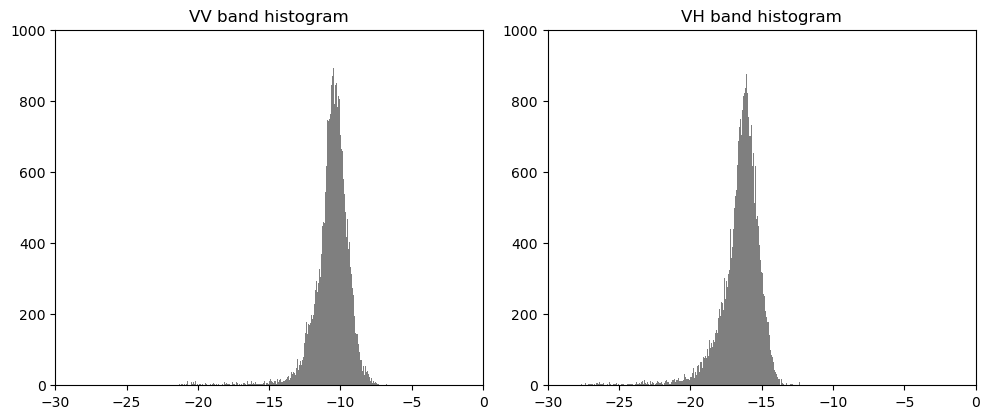

In [18]:
plot_band_histograms(training_dataset[0][0])

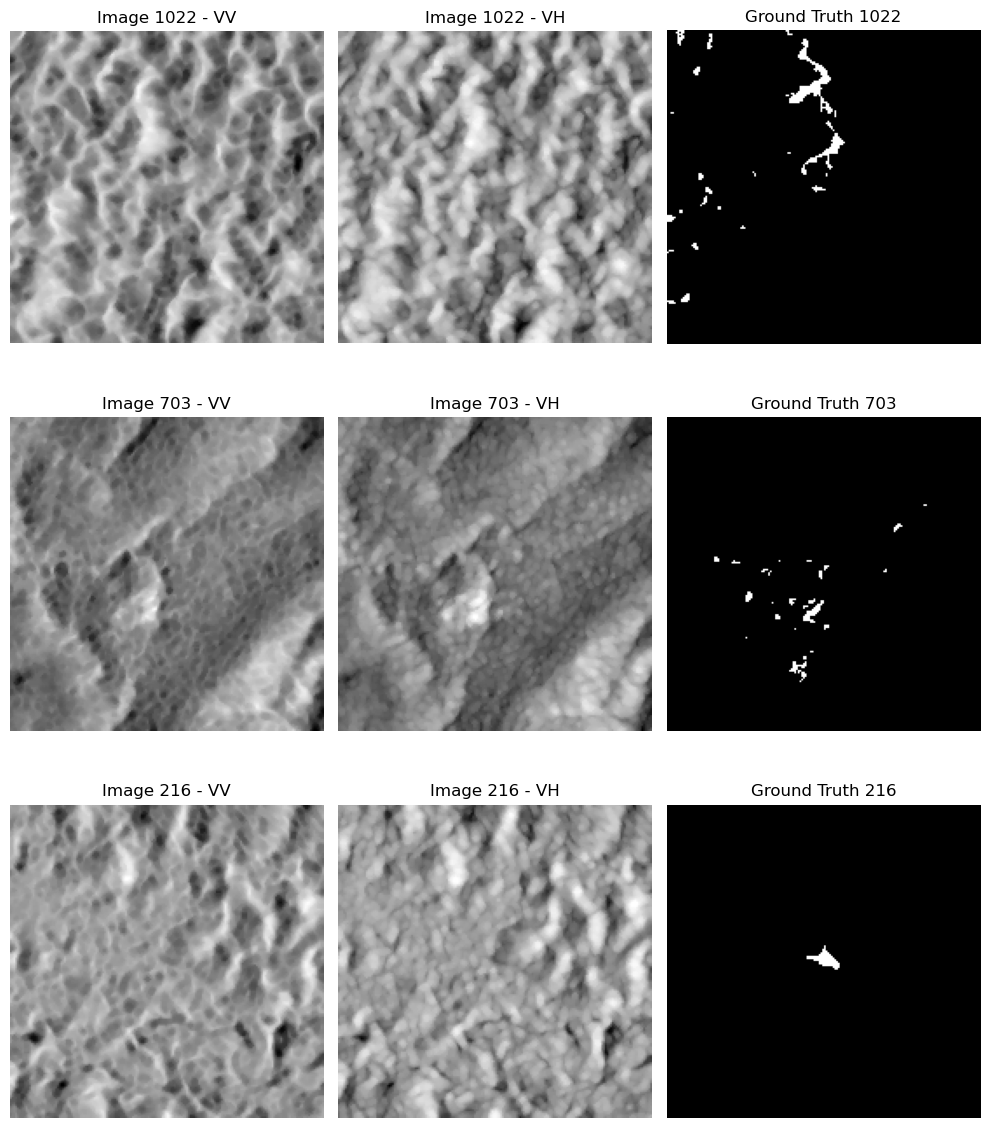

In [44]:
plot_example(training_dataset, indices=[10, 765, 458], normalization=linear_norm_global_percentile)